
<h2 align="center">Experiments (Sander's paper, fig.2)</h2> 

In this experiment we reproduce the experiment from fig.2 in the Elastica paper. We analyze the response of single orientaiton selective neuron (with prefered orientation 1 radian, or around 60 degrees). Its response is modulated by 32 neurons with varying orientation from 0 to pi.

In [50]:
# Imports
import math as m
import numpy as np
import holoviews as hv
import pylab as pl
from pylab import exp,cos,sin,pi,tan, pi
import pandas as pd
import seaborn as sb
import holoviews as hv
from IPython.display import SVG
import io
from PIL import Image
from random import random
import elastica as el
import elastica_neurons as en
from dynamics import *
import matplotlib as mpl

%matplotlib inline
hv.notebook_extension()

In [85]:
# Define some variables
# number of neurons
nn = 100
# flanker orientation
flanker = pl.pi/2+pl.pi/10
center = pl.pi/2
#center = 3*pl.pi/4
#lanker = 3*pl.pi/4
center = 0
flanker = 0
#center = pl.pi/2
#flanker = pl.pi/4
# constants for von mises function
A = 3
k = 0.25
# offset energy
E0 = 4
# strength of the modulation
a = 0.1
# different flanker orientations
theta = pl.linspace(0,pl.pi,nn)
# elastica energies for different flanker orientations (calculated below)
energies = np.zeros(nn)




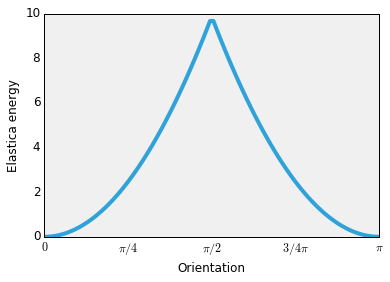

In [86]:
# Elastica energies between neuron with orientation 1 rad and population of 32 neurons with variable orientation from 0 to pi
for i in range(nn):
    energies[i] = en.E(theta[i],flanker,[1,0])
mpl.rcParams.update({'font.size': 12})
plt.plot(theta,energies,linewidth=4)
plt.xlabel('Orientation')
plt.ylabel('Elastica energy')
plt.xlim(0,np.pi)
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4,np.pi], [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3/4\pi$', r'$\pi$'])
plt.savefig('../Report/Pictures/experiments/exp1_fig2/el_ener'+str(round(center,1))+'_'+str(round(flanker,1))+'.png', dpi=200,bbox_inches='tight')



Calculate h, in additive and multiplicate models

In [76]:
modulation_ad = -a*(energies - E0)
modulation_mp = np.exp(-a*(energies - E0))

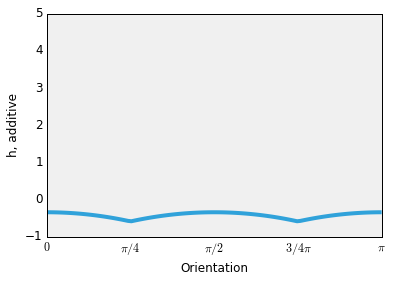

In [77]:
# Additive
plt.plot(theta,modulation_ad,linewidth=4)
plt.ylim([-1,5])
plt.xlabel('Orientation')
plt.ylabel('h, additive')
plt.xlim(0,np.pi)
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4,np.pi], [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3/4\pi$', r'$\pi$'])
plt.savefig('../Report/Pictures/experiments/exp1_fig2/h_add'+str(round(center,1))+'_'+str(round(flanker,1))+'.png', dpi=200,bbox_inches='tight')



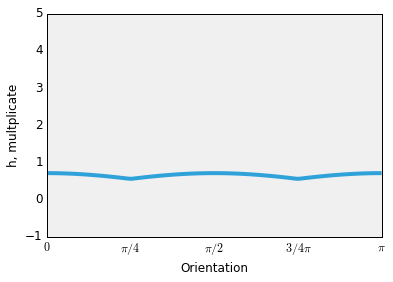

In [78]:
# Multiplicative
plt.plot(theta,modulation_mp,linewidth=4)
plt.ylim([-1,5])
plt.xlabel('Orientation')
plt.ylabel('h, multplicate')
plt.xlim(0,np.pi)
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4,np.pi], [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3/4\pi$', r'$\pi$'])
plt.savefig('../Report/Pictures/experiments/exp1_fig2/h_mul'+str(round(center,1))+'_'+str(round(flanker,1))+'.png', dpi=200,bbox_inches='tight')


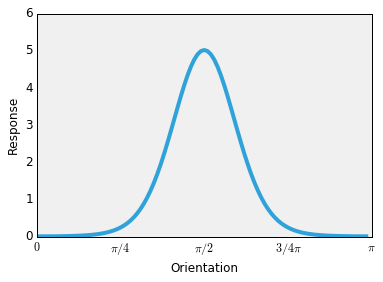

In [79]:
# Central drive
curve,x,y = mises_curve(A,k,center,neuron=nn)
plt.plot(x,y,linewidth=4)
plt.xlabel('Orientation')
plt.ylabel('Response')
plt.xlim(0,np.pi)
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4,np.pi], [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3/4\pi$', r'$\pi$'])
plt.savefig('../Report/Pictures/experiments/exp1_fig2/cen'+str(round(center,1))+'_'+str(round(flanker,1))+'.png', dpi=200,bbox_inches='tight')


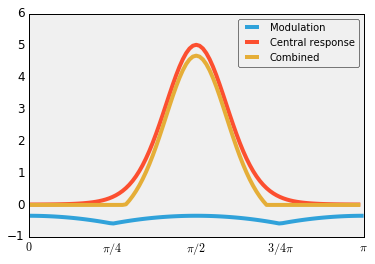

In [80]:
# Additive
mod, = plt.plot(theta,modulation_ad, label='Modulation',linewidth=4)
cen, = plt.plot(x,y, label='Central response',linewidth=4)
# Take only the positive values
com, = plt.plot(x,(y+modulation_ad).clip(min=0), label='Combined', linewidth=4)

plt.legend(handles=[mod, cen, com])
plt.xlim(0,np.pi)
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4,np.pi], [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3/4\pi$', r'$\pi$'])
plt.savefig('../Report/Pictures/experiments/exp1_fig2/ad_comb'+str(round(center,1))+'_'+str(round(flanker,1))+'.png', dpi=200,bbox_inches='tight')


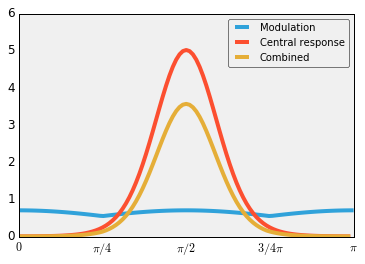

In [81]:
# Multiplicative
mod, = plt.plot(theta,modulation_mp, label='Modulation', linewidth=4)
cen, = plt.plot(x,y, label='Central response', linewidth=4)
com, = plt.plot(x,np.multiply(y,modulation_mp), label='Combined', linewidth=4)

plt.legend(handles=[mod, cen, com])
plt.xlim(0,np.pi)
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4,np.pi], [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3/4\pi$', r'$\pi$'])
plt.savefig('../Report/Pictures/experiments/exp1_fig2/mul_comb'+str(round(center,1))+'_'+str(round(flanker,1))+'.png', dpi=200,bbox_inches='tight')
